# Boston Housing Dataset

In [1]:
#let's load and set our intitial necessary tools

import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to make this notebook's output identical/stable across runs
np.random.seed(7)

# set up numpy to display precision upto 3 decimal places and suppresses the use of scientific notation for small numbers
#np.set_printoptions(precision=3, suppress=True)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

pd.set_option('display.max_columns', None) # show all columns in a Pandas DataFrame
pd.set_option('display.max_rows', None)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rcParams['savefig.dpi'] = 80
mpl.rcParams['figure.dpi'] = 80
plt.rcParams['image.cmap'] = "gray"

# Where to save the data and figures
PROJECT_ROOT_DIR = "."
IMAGES_DIR = "images"
DATA_DIR = "data"
MODELS_DIR = "models"
SUB_DIR = "model-eval" # NOTE: update this for each project
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, IMAGES_DIR, SUB_DIR)
DATA_PATH = os.path.join(PROJECT_ROOT_DIR, DATA_DIR, SUB_DIR)
MODELS_PATH = os.path.join(PROJECT_ROOT_DIR, MODELS_DIR, SUB_DIR)
os.makedirs(IMAGES_PATH, exist_ok=True)
os.makedirs(DATA_PATH, exist_ok=True)
os.makedirs(MODELS_PATH, exist_ok=True)

# Function for saving figures
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
   # plt.savefig(path, format=fig_extension, dpi=resolution)

# Function for saving data downloaded from a URL
from six.moves import urllib
def save_data(file_url, file_name):
    path = os.path.join(DATA_PATH, file_name)
    print("Saving data file", file_name)
    urllib.request.urlretrieve(file_url, path)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
#warnings.filterwarnings(action='ignore', category=DeprecationWarning, module='sklearn')
#warnings.filterwarnings(action='ignore', category=FutureWarning, module='sklearn')

#loading the data 

In [2]:
# data is available on sklearn dataset library
from sklearn.datasets import load_boston
dataset = load_boston() # initializing an object 

/Users/harshitchandrol/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Califo

In [3]:
# lets try observing the dataset metadata
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
print("dataset keys():\n",dataset.keys()) # checking the keys ( different elements in this object)

dataset keys():
 dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [5]:
print("Shape of the data:", dataset.data.shape) # checking the shape of the data

Shape of the data: (506, 13)


In [6]:
# the dataset is bunch object
type(dataset)

sklearn.utils.Bunch

In [7]:
# lets see few data values in the dataset.
print("Starting few rows:",dataset.data[:2])

Starting few rows: [[0.006 18.000 2.310 0.000 0.538 6.575 65.200 4.090 1.000 296.000 15.300
  396.900 4.980]
 [0.027 0.000 7.070 0.000 0.469 6.421 78.900 4.967 2.000 242.000 17.800
  396.900 9.140]]


In [8]:
# now lets us check our targets
print("first few targets:",dataset.target[:2])

first few targets: [24.000 21.600]


In [9]:
# as we have labeled data we can have our machine learning model learn from the labeled data 
# and than we can predict using the model built [SUPERVISED LEARNING]
# but first we analyse and clean our data for better results
# for doing that first we convert our dataset.data into a dataFrame object

## Converting the data to a pandas object

In [10]:
# as we are going to use pandas library
#dataframe object
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)
df['MEDV'] = dataset.target # also adding our target to our dataframe 
df.head() # checking few head rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
# as we planned to perform classification as well, we can categorize the MEDV (target) into 2 categories
# [ HIGH & LOW]
# defining a function to perform this would be easier using an if else statement
def category(row):
    if row['MEDV'] > 30:
        val = "HIGH"
    else:
        val = "LOW"
    return val

# it was just a small function but it will help us a lot!!
# actually we have one other way to do it.
# df["CAT_MEDV"] = np.where(df['MEDV']>=30,'HIGH','LOW')
# let call it over MEDV column and create a new column CAT_MEDV
df['CAT_MEDV'] = df.apply(category,axis=1)
# checking the head rows
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT_MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,LOW
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,LOW
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,HIGH
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,HIGH
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,HIGH


In [12]:
# ok good work so far , let us prepare our data for modeling

In [13]:
# checking out the stats of the data
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [14]:
# looks like there are no missing values but we can confirm to be sure
df.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
MEDV        0
CAT_MEDV    0
dtype: int64

/Users/harshitchandrol/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


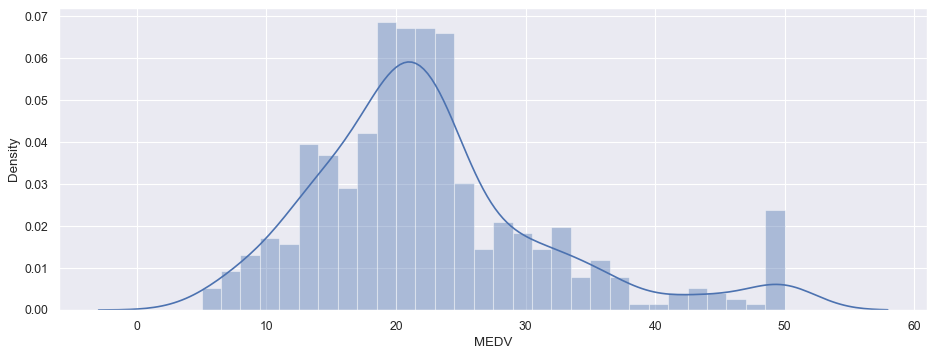

In [15]:
#Lets do some Exploratory data analysis, trying to put in the new techniques learned from datacamp courses.
sns.set(rc={'figure.figsize':(14,5)})
sns.distplot(df['MEDV'],bins=30)
plt.show()

this graph shows that the MEDV is somewhat normally distributed with some outliers

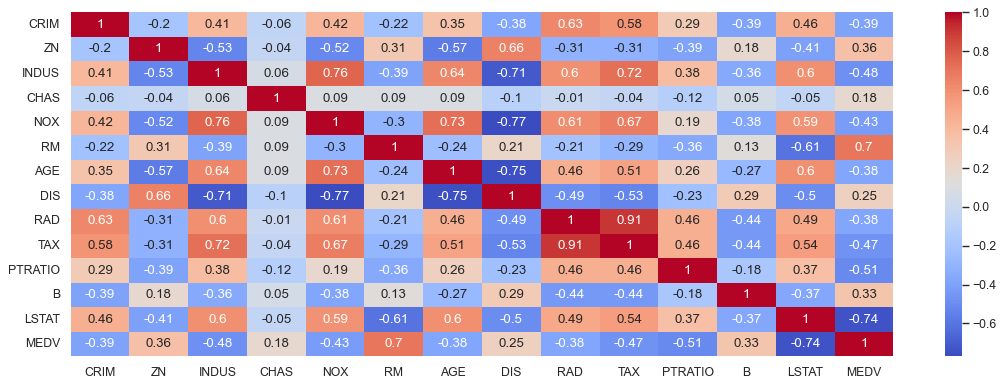

In [16]:

sns.heatmap(data=df.corr().round(2),cmap='coolwarm',annot=True)
plt.tight_layout()
plt.show()

In [17]:
# revising correlation: 
# correlation provides us an idea about how two variables are correlated with each other. [-1,1]
# close to 1 - strong positive correlation
# close to -1 - strong negative correlation
# here we can see that, RM variable has a strong positive correlation (0.7)
# while LSTAT has a strong negative correlation (-0.7)

/Users/harshitchandrol/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


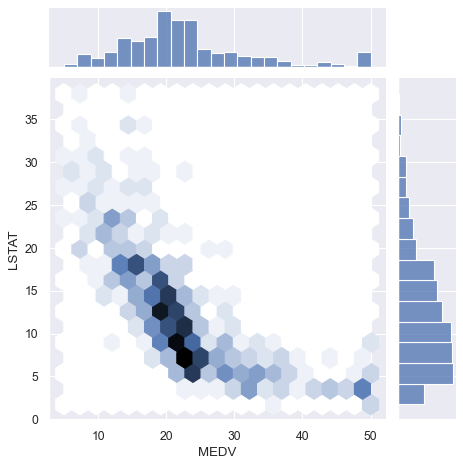

In [18]:
# lets plot a jointplot with MEDV and LSTAT
sns.jointplot(df['MEDV'],df['LSTAT'],kind='hex')

The hexagonal bins show the density of data points in different regions of the plot, with darker bins indicating a higher density of data points. The plot suggests that there is a clear negative relationship between MEDV and LSTAT, with higher values of LSTAT tending to be associated with lower values of MEDV.

/Users/harshitchandrol/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>

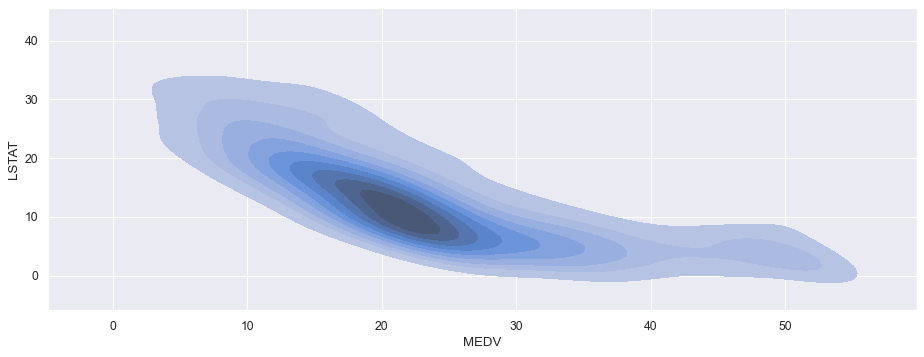

In [19]:
# this time lets see the kde plot
sns.kdeplot(df['MEDV'],df['LSTAT'],shade=True)

kdeplot() function is used to plot the data against a single/univariate variable. It represents the probability distribution of the data values as the area under the plotted curve.
The plot shows that there is a clear negative relationship between the two variables, with higher values of LSTAT tending to be associated with lower values of MEDV. The plot also suggests that there may be some clustering of data points in certain areas, particularly at the low end of LSTAT and the high end of MEDV.

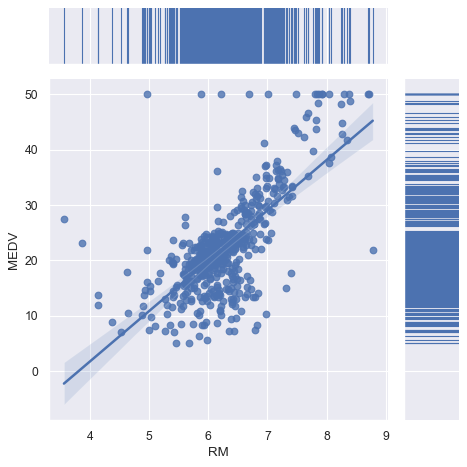

In [20]:
# also, we can check the average numbers of rooms per dwelling
grid=sns.JointGrid(x='RM',y='MEDV',data=df,space=0)
grid.plot_joint(sns.regplot,color='b')
grid.plot_marginals(sns.rugplot,color='b',height=4)
plt.tight_layout()
plt.show()

 the plot suggests that RM is likely to be a strong predictor of MEDV in the Boston Housing dataset, as the relationship between the two variables appears to be quite strong and positive. The plot also suggests that there may be some outliers in the data, particularly on the high end of MEDV.

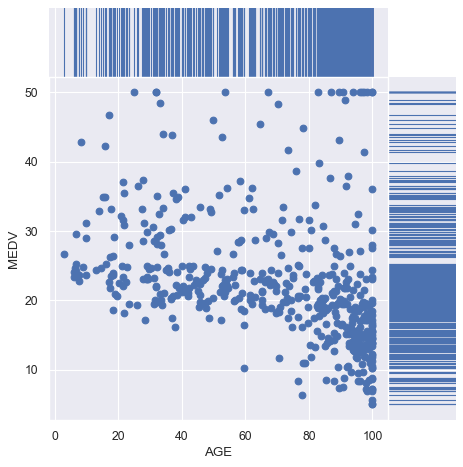

In [21]:
# we can also, see the proportion of owner occupier units built prior to 1940
grid = sns.JointGrid(x='AGE', y='MEDV', data=df, space=0)
grid.plot_joint(plt.scatter, color="b")
grid.plot_marginals(sns.rugplot, color="b", height=4)
plt.show()

The plot suggests that there may be a slight negative relationship between AGE and MEDV. Specifically, as the proportion of owner-occupied units built prior to 1940 increases, the median value of owner-occupied homes tends to decrease slightly. However, the relationship appears to be quite weak, with considerable variability in the distribution of MEDV at each level of AGE.

<AxesSubplot:xlabel='RAD', ylabel='MEDV'>

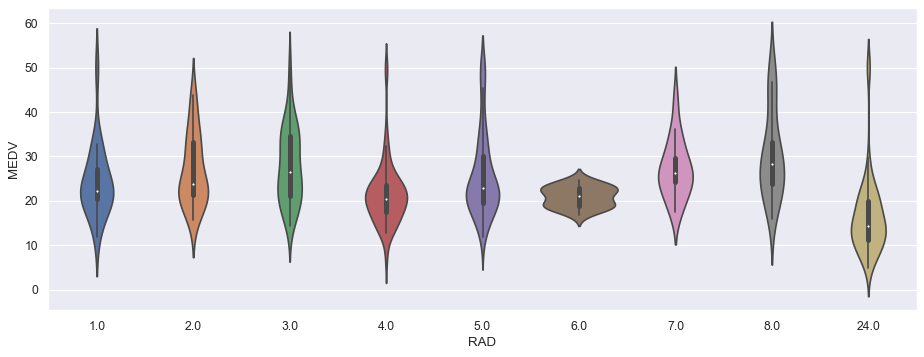

In [22]:
# the below graph will show the index of accessiblity to radial highways
sns.violinplot(x='RAD', y='MEDV', data=df)

a voilon plot is a hybrid of boxplot and kernel density plot which shows peaks in the data. it can be used to visualize the ditribution of numerical data. it can also depict summary statistics and the density of each variable.
hence, The plot shows that the distribution of MEDV varies across different levels of RAD. Specifically, the median value of MEDV appears to be higher for lower levels of RAD (e.g., RAD=1) and lower for higher levels of RAD (e.g., RAD=24). There is also considerable variability in the distribution of MEDV within each category of RAD.
the plot also suggests that RAD may be an important predictor of MEDV in the Boston Housing dataset, as there appears to be some variation in median value across different levels of RAD.

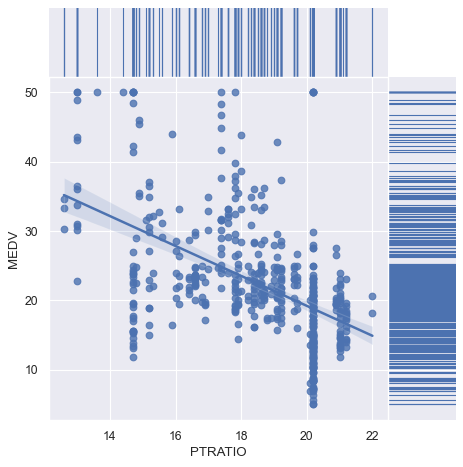

In [23]:
# Checking pupil teacher ratio by town
grid = sns.JointGrid(x='PTRATIO', y='MEDV', data=df, space=0)
grid.plot_joint(sns.regplot, color="b")
grid.plot_marginals(sns.rugplot, color="b", height=4)
plt.show()

The regression line suggests a slightly negative relationship between the two variables, indicating that as the pupil-teacher ratio increases, the median value of owner-occupied homes tends to decrease slightly. The plot suggests that there may be a weak negative relationship between PTRATIO and MEDV

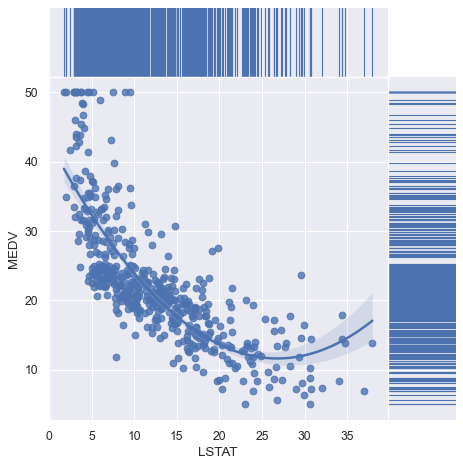

In [24]:
# percentage of lower status of the population
grid = sns.JointGrid(x='LSTAT', y='MEDV', data=df, space=0)
grid.plot_joint(sns.regplot, color="b", order=2)
grid.plot_marginals(sns.rugplot, color="b", height=4)
plt.show()

the plot suggests that there is a negative relationship between LSTAT and MEDV, which means that as the percentage of lower status of the population increases, the median value of owner-occupied homes tends to decrease. The curved regression line also suggests that the relationship may be more complex than a simple linear relationship.

# Data Preperation

In [25]:
# first lets us see our possible categorical variables and convert them into cateogry type
# 1. CHAS - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
df['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [26]:
df['CAT_CHAS'] = df['CHAS'].astype('category')
df.describe(include='category')

,CAT_CHAS
count,506.0
unique,2.0
top,0.0
freq,471.0


<AxesSubplot:>

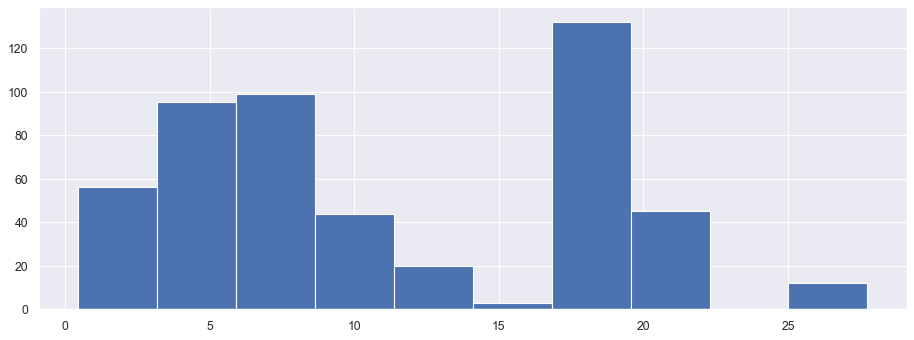

In [27]:
# 2 indus- proportion of non-retail business acres per town
df['INDUS'].hist()

In [28]:
# as this is a continious variables and we want to convert it into a category we will define three categories [LOW,MED,HIGH]
# with some customization. let try it using pandas categoricalDtype library we learned in datacamp course
df['CAT_INDUS']= np.floor_divide(df['INDUS'],10)
from pandas.api.types import CategoricalDtype
cat_type2 = CategoricalDtype(categories=[0, 1, 2], ordered=True) #customizing categories

df['CAT_INDUS'] = df['CAT_INDUS'].astype(cat_type2)
df['CAT_INDUS'].cat.rename_categories({0: 'LOW', 1: 'MED', 2: 'HIGH'}, inplace=True)

df.describe(include='category')

/var/folders/lq/d88dgpfd7x5dywf41x7l02dw0000gn/T/ipykernel_5129/1556350298.py:8: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  df['CAT_INDUS'].cat.rename_categories({0: 'LOW', 1: 'MED', 2: 'HIGH'}, inplace=True)


,CAT_CHAS,CAT_INDUS
count,506.0,506
unique,2.0,3
top,0.0,LOW
freq,471.0,270


In [29]:
df['CAT_INDUS'].value_counts()

LOW     270
MED     209
HIGH     27
Name: CAT_INDUS, dtype: int64

In [30]:
## now dropping the original CHAS and INDUS columns as we will be using the categorical type ones.
df.drop(['CHAS','INDUS'],axis=1,inplace=True)
df.head()

,CRIM,ZN,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT_MEDV,CAT_CHAS,CAT_INDUS
0,0.00632,18.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,LOW,0.0,LOW
1,0.02731,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,LOW,0.0,LOW
2,0.02729,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,HIGH,0.0,LOW
3,0.03237,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,HIGH,0.0,LOW
4,0.06905,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,HIGH,0.0,LOW


In [31]:
# we will go one step ahead and convert the CAT_MEDV to numerical as ML models prefer nuneric datatypes
codes = {'LOW':0,'HIGH':1}
df['CAT_MEDV']= df['CAT_MEDV'].map(codes)
df['CAT_MEDV'].value_counts()

0    422
1     84
Name: CAT_MEDV, dtype: int64

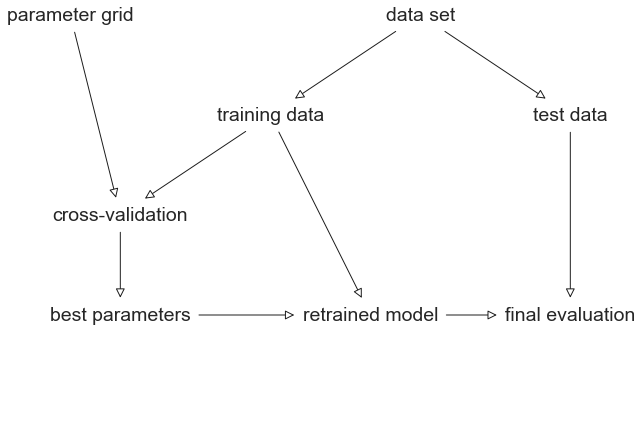

In [32]:
# Now i beleive we are good with our first intital model prepation step 
# and we are going to start with out classification models pipeline setup. 
# let check the mglearn plot for this.
import mglearn
mglearn.plots.plot_grid_search_overview()

In [33]:
# time to start working on this. 
# we will use our old step wise step approach as per convinctions.hence, let start with splitting out data.

### Train Test SPlit

In [34]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(df, test_size=0.2,random_state=444)

In [35]:
train_set.shape

(404, 15)

so our train set is having 404 rows and the 15 cloumns , thats our 80% of the data.

In [36]:
test_set.shape  # 20 percent of our data is our test set.

(102, 15)

In [37]:
# now to fit we need to seperate out data and data labels and drop irrevelant attributes
data=train_set.drop(['MEDV','CAT_MEDV'],axis=1) # dropping our targets
data_labels = train_set['CAT_MEDV'].copy() # assigning our target to data labels

In [38]:
# we should perform the same thing with the test set also
test_data=test_set.drop(['MEDV','CAT_MEDV'],axis=1) # dropping our targets
test_data_labels = test_set['CAT_MEDV'].copy() # assigning our target to data labels

In [39]:
## now i feel that we are all set with bulding out pipeline for data preprocessing
# 1. lets set different types of attributes which will help us perform scaling techniques easily
# numeric attributes
num_attribs = list(data.select_dtypes(include='number').columns)
num_attribs

['CRIM',
 'ZN',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [40]:
#ordinal attibutes , CAT_INDUS is our ordinal attributes as it has ordered values
ord_attribs = ['CAT_INDUS']
# categorical attributes
cat_attribs= ['CAT_CHAS']

now, we can create two version of data prepration pipelines, one with scaling and one withour scaling. then we can combine with models based on which one needs scaling

## But first understand what is a data prepration pipeline
a pipeline for data prepration refers to a systematic process of transforming raw data into a format that is suitable for analysis or ML. the pipeline can involve several stages and steps that are performed sequentially to acheive the desired output. 
some of the stages or steps a pipeline can do are:
1. Data collection - the first step in the data prepration pipeline is to collect the data from various resources, such as databases, APIs, orr web scrapping. ( here we are manually feeding the data so, this step is not required in our pipeline)
2. Data Cleaning - the collected data may contain error, missing values, or inconsistencies, which need to be indentified and rectified. this step includes data cleaning like data profiling, data standardization and data normalization. ( we are using available data from sklearn datasets, which is up to a level normalized and standardizzed, hence not required in our pipeline, we will perform some standardization to revise our knowledge in standartization.
3. Data Transformation - after cleaning the dataset, the next step is to transform it into a format that is easy for a ML model to work with. this may involves tasks like data aggregation, data encoding, and data reformating. (we will apply some of these in our pipeline).
4. Feature Engineering - Feature engineering referes to the process of creating new features from the existing data that can improve accuracy of the model. this steps ncludes feature selection, feature extraction and feature scaling. 
5. Data Splitting - we can also perform the train test slpit within a pipeline, this helps to evaluate the model's performance on new data that is not seen before.
6. Data Augmentation - data augmentation is the process of generating new data from the existing data to increase the diversity and size of the train set.
7. Data Normalization - Normalization is the process of rescaling the data to a range of values hat is easier to work with ML models. this step can help to imporve the performance of the model by reducing the impact of outliers.
8. Data Encoding - data encoding is the process of converting categorical data into numerical data that can be used by the models. this is essential for the model that requires numerical inputs. 
9. Data Scaling - it is the process of scaling the data to a simialr range, which can help to improve the performance of the model. this step is perticularly important for models that use distance based algorithms like KNN or clustering.
#### Now, combining all the steps above to create a clean and formated dataset that is ready for machine learning is known as data preprocessing. 

In [41]:
#lets import the libraries
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler # zero mean and unit variance, return numpy array
from sklearn.preprocessing import OrdinalEncoder # convert categorical features as ordinal integers
from sklearn.preprocessing import OneHotEncoder  # categorical features into one hot vectors
from sklearn.compose import ColumnTransformer #more comments below

#numerical data pipeline with scaling
num_pipe_scaled = Pipeline([
    ('num_imputer',SimpleImputer(strategy='median')), #this will impute missing values with median values 
    ('num_attribs_adder',None),
    ('num_std_scaler',StandardScaler()) # this will standardize the variable to zero mean and unit variance
])

#numerical data pipeline withour scaling
num_pipe_notscaled= Pipeline([
    ('num_imputer',SimpleImputer(strategy='median')), # just impute the missing values to median values
    ('num_attribs_adder',None)
])

# ordinal pipeline
ord_pipe = Pipeline([
    ('cat_ordinal_imputer',SimpleImputer(strategy='most_frequent')), # impute the missing values with most frequnt values
    ('cat_ordinal_encoder',OrdinalEncoder()) # encode the orders to the categorical data
])

# categorical pipeline
cat_pipe = Pipeline([
    ('cat_imputer',SimpleImputer(strategy='most_frequent')), # impute the missing values with most frequent vlues
    ('cat_onehot_encoder',OneHotEncoder()) #oneHot encode the categorical values
])


# now, we can create a data preprocessing pipeline to perform all the above processing steps using column transfer
prep_pipe_scaled = ColumnTransformer([
    ('num_scaled',num_pipe_scaled,num_attribs), # numerical variables with scaling
    ('ord',ord_pipe,ord_attribs), # ordinal attributes imputing and encoding
    ('cat',cat_pipe,cat_attribs), # cat variables imputing and encoding
],n_jobs=-1) # n_jobs allows to use all the CPU power/cores 

# below is the pipeline for not scaled variables
prep_pipe_notscaled = ColumnTransformer([
        ("num_notscaled", num_pipe_notscaled, num_attribs), # numerical attributes without scaling
        ("ord", ord_pipe, ord_attribs),
        ("cat", cat_pipe, cat_attribs),
    ], n_jobs=-1)

The ColumnTransformer class from the sklearn.compose module is a data preprocessing tool in sklean that allows us to apply different transformations to different columns or subsets of columns in a dataset.
the ColumnTransformer class takes a list of transformers and applies them to specified columns of the input data. each transformer is specified as a tuple containing a name for the transformer, a transformer object, and list of columns or indecis to apply the transformer to.
for example, suppose we have a dataset 'Master' with columns for numerical data, categorical data, and text features. we want to apply different preprocessing steps to each of these data types. we can use the ColumnTransfer class to apply a StandardScaler to the numerical features, a OneHotEncoder to the categorical features and the countVectorizer for the text features. 

### Pipeline for Model selection using Grid Search and cross validation
- creating a pipeline for model selection will help us to select among multiple classifier and tune the best algorithm in a single step. we can specify the parameter grid for a pipeline in a grid search, we need to speicfy for each parameter which step of the pipeline it belongs to.

In [42]:
# importing the classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# we can start with let's say RandomForestClassifier pipeline but then we can modify it later with parameter grid.
pipe = Pipeline([
    ('prep',prep_pipe_scaled), # only initiating with scaled pipeline
    ('clf',RandomForestClassifier()) # clf is the nick name for classifier used
])

#defining the parameter grid so that we can change the preprocessor and classifier as well as thier hyperparameters
# The syntax to define a parameter grid for a pipeline is to specify for each parameter the step name, 
# followed by __ (a double underscore), followed by the parameter name. 
param_grid = [
    {'prep': [prep_pipe_scaled],
     'clf': [SVC()],
     'clf__kernel':['rbf', 'linear'],
     'clf__C': [0.01, 0.1, 1, 10, 100],
     'clf__gamma': [0.01, 0.1, 1, 10, 100]
    },
    {'prep': [prep_pipe_scaled], # check whether it is better to scale or not
     'clf': [LogisticRegression(max_iter=100000)],
     'clf__C': [0.01, 0.1, 1, 10, 100]
    },
    {'prep': [prep_pipe_scaled, prep_pipe_notscaled], # check whether it is better to scale or not
     'clf': [RandomForestClassifier()],
     'clf__max_features': ['sqrt', 'log2'],
     'clf__n_estimators': [100, 200],
     'clf__max_depth': [3, 5, None],
    },
    {'prep': [prep_pipe_scaled, prep_pipe_notscaled], # check whether it is better to scale or not
     'clf': [GradientBoostingClassifier()],
     'clf__n_estimators': [100, 200],
     'clf__max_depth': [3, 5],
    }]

Ok!!! so far its good, now, lets perform model selection with the data Proproccing pipeline we created and Grid Search Cross Validation.
we will be evaluating metrics mentioned below using the grid search
- accuracy
- precision 
- recall
- f1_score
- AUC

its very important to understand the metrics before applying them. i have refered to the documentations.

In [43]:
# we need to import GridSearchCV for this
from sklearn.model_selection import GridSearchCV

# using multiple metrics for reporting cross validation scores
scoring = {'accuracy':'accuracy','precision (macro)':'precision_macro',
          'recall (macro)':'recall_macro','f1 (macro)':'f1_macro','AUC':'roc_auc'}

grid = GridSearchCV(estimator=pipe,param_grid=param_grid,cv=3,
                   scoring=scoring,refit='f1 (macro)',
                   return_train_score=True,
                   n_jobs=-1,verbose=1)

In [44]:
# yes, its time to fit out data
grid.fit(data,data_labels)

Fitting 3 folds for each of 87 candidates, totalling 261 fits


/Users/harshitchandrol/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/harshitchandrol/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/harshitchandrol/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/harshitchandrol/opt/a

/Users/harshitchandrol/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/harshitchandrol/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/harshitchandrol/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/harshitchandrol/opt/a

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(n_jobs=-1,
                                                          transformers=[('num_scaled',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('num_attribs_adder',
                                                                                          None),
                                                                                         ('num_std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['CRIM',
                                      

In [45]:
# it gave us a long text, but we need to find the best f1_score amongst all the models
print("Best cross-validation score (F1 score):{:.3f}".format(grid.best_score_))

Best cross-validation score (F1 score):0.934


In [46]:
# let us also get the best parameters resulting to the best score
print("\n".join("{}:{}\n".format(k,v) for k,v in grid.best_params_.items()))

clf:RandomForestClassifier(max_features='log2')

clf__max_depth:None

clf__max_features:log2

clf__n_estimators:100

prep:ColumnTransformer(n_jobs=-1,
                  transformers=[('num_notscaled',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('num_attribs_adder', None)]),
                                 ['CRIM', 'ZN', 'NOX', 'RM', 'AGE', 'DIS',
                                  'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']),
                                ('ord',
                                 Pipeline(steps=[('cat_ordinal_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('cat_ordinal_encoder',
                                                  OrdinalEncoder())]),
                                 ['CAT_INDUS']),
                     

In [47]:
# we can also get the best estimators 
grid.best_estimator_.named_steps['prep'].transformers

[('num_notscaled',
  Pipeline(steps=[('num_imputer', SimpleImputer(strategy='median')),
                  ('num_attribs_adder', None)]),
  ['CRIM',
   'ZN',
   'NOX',
   'RM',
   'AGE',
   'DIS',
   'RAD',
   'TAX',
   'PTRATIO',
   'B',
   'LSTAT']),
 ('ord',
  Pipeline(steps=[('cat_ordinal_imputer',
                   SimpleImputer(strategy='most_frequent')),
                  ('cat_ordinal_encoder', OrdinalEncoder())]),
  ['CAT_INDUS']),
 ('cat',
  Pipeline(steps=[('cat_imputer', SimpleImputer(strategy='most_frequent')),
                  ('cat_onehot_encoder', OneHotEncoder())]),
  ['CAT_CHAS'])]

In [48]:
grid.best_estimator_.named_steps['clf']

RandomForestClassifier(max_features='log2')

So from the grid_search we observed that the best model is the RandomForestClassifier with a max_depth of 3 and max_features of sqrt. we are geeting the f1_score of 93.6% which is great!

In [49]:
# lests check all the scoring metrics for the all classifier, for this
# we can convert the results into a dataframe
results= pd.DataFrame(grid.cv_results_)

# show the transpose version of the resulting dataframe
# dsplaying columns reporting CV scores on the test partition
print('\nCross-validation scores for all parameter combinations:')
results.T.loc[['params', 'mean_test_f1 (macro)', 'mean_test_precision (macro)', 'mean_test_recall (macro)', 
         'mean_test_accuracy', 'mean_test_AUC']]


Cross-validation scores for all parameter combinations:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86
params,"{'clf': SVC(), 'clf__C': 0.01, 'clf__gamma': 0...","{'clf': SVC(), 'clf__C': 0.01, 'clf__gamma': 0...","{'clf': SVC(), 'clf__C': 0.01, 'clf__gamma': 0...","{'clf': SVC(), 'clf__C': 0.01, 'clf__gamma': 0...","{'clf': SVC(), 'clf__C': 0.01, 'clf__gamma': 1...","{'clf': SVC(), 'clf__C': 0.01, 'clf__gamma': 1...","{'clf': SVC(), 'clf__C': 0.01, 'clf__gamma': 1...","{'clf': SVC(), 'clf__C': 0.01, 'clf__gamma': 1...","{'clf': SVC(), 'clf__C': 0.01, 'clf__gamma': 1...","{'clf': SVC(), 'clf__C': 0.01, 'clf__gamma': 1...","{'clf': SVC(), 'clf__C': 0.1, 'clf__gamma': 0....","{'clf': SVC(), 'clf__C': 0.1, 'clf__gamma': 0....","{'clf': SVC(), 'clf__C': 0.1, 'clf__gamma': 0....","{'clf': SVC(), 'clf__C': 0.1, 'clf__gamma': 0....","{'clf': SVC(), 'clf__C': 0.1, 'clf__gamma': 1,...","{'clf': SVC(), 'clf__C': 0.1, 'clf__gamma': 1,...","{'clf': SVC(), 'clf__C': 0.1, 'clf__gamma': 10...","{'clf': SVC(), 'clf__C': 0.1, 'clf__gamma': 10...","{'clf': SVC(), 'clf__C': 0.1, 'clf__gamma': 10...","{'clf': SVC(), 'clf__C': 0.1, 'clf__gamma': 10...","{'clf': SVC(), 'clf__C': 1, 'clf__gamma': 0.01...","{'clf': SVC(), 'clf__C': 1, 'clf__gamma': 0.01...","{'clf': SVC(), 'clf__C': 1, 'clf__gamma': 0.1,...","{'clf': SVC(), 'clf__C': 1, 'clf__gamma': 0.1,...","{'clf': SVC(), 'clf__C': 1, 'clf__gamma': 1, '...","{'clf': SVC(), 'clf__C': 1, 'clf__gamma': 1, '...","{'clf': SVC(), 'clf__C': 1, 'clf__gamma': 10, ...","{'clf': SVC(), 'clf__C': 1, 'clf__gamma': 10, ...","{'clf': SVC(), 'clf__C': 1, 'clf__gamma': 100,...","{'clf': SVC(), 'clf__C': 1, 'clf__gamma': 100,...","{'clf': SVC(), 'clf__C': 10, 'clf__gamma': 0.0...","{'clf': SVC(), 'clf__C': 10, 'clf__gamma': 0.0...","{'clf': SVC(), 'clf__C': 10, 'clf__gamma': 0.1...","{'clf': SVC(), 'clf__C': 10, 'clf__gamma': 0.1...","{'clf': SVC(), 'clf__C': 10, 'clf__gamma': 1, ...","{'clf': SVC(), 'clf__C': 10, 'clf__gamma': 1, ...","{'clf': SVC(), 'clf__C': 10, 'clf__gamma': 10,...","{'clf': SVC(), 'clf__C': 10, 'clf__gamma': 10,...","{'clf': SVC(), 'clf__C': 10, 'clf__gamma': 100...","{'clf': SVC(), 'clf__C': 10, 'clf__gamma': 100...","{'clf': SVC(), 'clf__C': 100, 'clf__gamma': 0....","{'clf': SVC(), 'clf__C': 100, 'clf__gamma': 0....","{'clf': SVC(), 'clf__C': 100, 'clf__gamma': 0....","{'clf': SVC(), 'clf__C': 100, 'clf__gamma': 0....","{'clf': SVC(), 'clf__C': 100, 'clf__gamma': 1,...","{'clf': SVC(), 'clf__C': 100, 'clf__gamma': 1,...","{'clf': SVC(), 'clf__C': 100, 'clf__gamma': 10...","{'clf': SVC(), 'clf__C': 100, 'clf__gamma': 10...","{'clf': SVC(), 'clf__C': 100, 'clf__gamma': 10...","{'clf': SVC(), 'clf__C': 100, 'clf__gamma': 10...","{'clf': LogisticRegression(max_iter=100000), '...","{'clf': LogisticRegression(max_iter=100000), '...","{'clf': LogisticRegression(max_iter=100000), '...","{'clf': LogisticRegression(max_iter=100000), '...","{'clf': LogisticRegression(max_iter=100000), '...",{'clf': RandomForestClassifier(max_features='l...,{'clf': RandomForestClassifier(max_features='l...,{'clf': RandomForestClassifier(max_features='l...,{'clf': RandomForestClassifier(max_features='l...,{'clf': RandomForestClassifier(max_features='l...,{'clf': RandomForestClassifier(max_features='l...,{'clf': RandomForestClassifier(max_features='l...,{'clf': RandomForestClassifier(max_features='l...,{'clf': RandomForestClassifier(max_features='l...,{'clf': RandomForestClassifier(max_features='l...,{'clf': RandomForestClassifier(max_features='l...,{'clf': RandomForestClassifier(max_features='l...,{'clf': RandomForestClassifier(max_features='l...,{'clf': RandomForestClassifier(max_features='l...,{'clf': RandomForestClassifier(max_features='l...,{'clf': RandomForestClassifier(max_features='l...,{'clf': RandomForestClassifier(max_features='l...,{'clf': RandomForestClassifier(

this gives us the view which algorithm restults best for different type of scoring metrics. 

In [50]:
# for our best classifier lets print the results for all scoring metrics
# display the cross-validation scoring metrics for the best estimator
results.loc[results['mean_test_f1 (macro)'] == grid.best_score_].T.loc[['params', 'mean_test_f1 (macro)', 'mean_test_precision (macro)', 'mean_test_recall (macro)', 
         'mean_test_accuracy', 'mean_test_AUC']]

,76
params,{'clf': RandomForestClassifier(max_features='l...
mean_test_f1 (macro),0.93388
mean_test_precision (macro),0.947523
mean_test_recall (macro),0.922305
mean_test_accuracy,0.965377
mean_test_AUC,0.984984


### Seems RandomForestCassifier worked really good when evaluated amongst multiple metrics.

Let us implement our newly learnt Permutation feature importance concepts

Permutation feature importance is a technique used to determine the relative importance of different features in a ML model. it works by shuffeling the values of a single feature and measuring the resulting decrease in the model's performance. The idea behind this technique is that if a feature is important to the model, permuting its values should lead to a significant drop in the model's performance. on the other hand, if a feature is unimportant permuting its values should have little to no effect on the performance.
the permutation feature importance can be calculated using different metrics such as accuracy,, presision, recall, or F1_score, depending in the specific problem and the evaluation metrics of interest. the resulting importance scores can be used to rank the features in terms of their contribution to the model's performance, which can be useful for feature selection, understanding the model's behaviour and identifying potential areas of improvement.

In [51]:
from sklearn.inspection import permutation_importance
r = permutation_importance(grid.best_estimator_,data, data_labels,n_repeats=10,random_state=0)

In [52]:
for i in r.importances_mean.argsort()[::-1]:
    print(f"{data.columns[i]:<12}"
         f"{r.importances_mean[i]:.3f}"
         f" +/- {r.importances_std[i]:.3f}")

RM          0.088 +/- 0.012
LSTAT       0.029 +/- 0.007
DIS         0.005 +/- 0.000
TAX         0.005 +/- 0.001
PTRATIO     0.004 +/- 0.003
CRIM        0.002 +/- 0.001
B           0.001 +/- 0.001
AGE         0.001 +/- 0.001
NOX         0.000 +/- 0.001
RAD         0.000 +/- 0.001
CAT_INDUS   0.000 +/- 0.000
CAT_CHAS    0.000 +/- 0.000
ZN          0.000 +/- 0.000


In [53]:
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{data.columns[i]:<12}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

RM          0.088 +/- 0.012
LSTAT       0.029 +/- 0.007
DIS         0.005 +/- 0.000
TAX         0.005 +/- 0.001


Computing partial dependence plots...


/Users/harshitchandrol/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


done in 2.091s


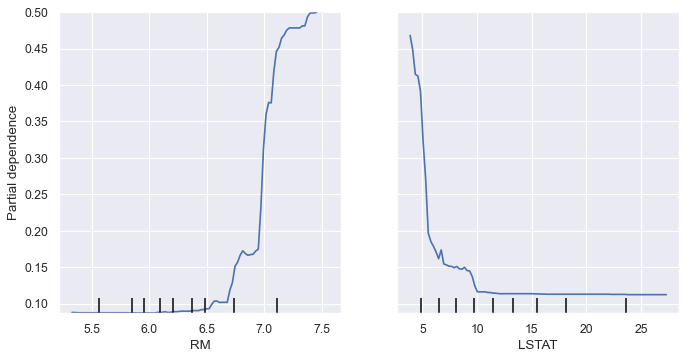

In [54]:
from sklearn.inspection import plot_partial_dependence
from time import time

print('Computing partial dependence plots...')
tic = time()

plot_partial_dependence(grid.best_estimator_, data, [3, 10]); # no interactions included
print("done in {:.3f}s".format(time() - tic))

fig = plt.gcf() # get current figure
fig.set_figheight(5)
fig.set_figwidth(10);

In [55]:
data.columns.to_list()

['CRIM',
 'ZN',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'CAT_CHAS',
 'CAT_INDUS']

Computing partial dependence plots...


/Users/harshitchandrol/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


done in 0.655s


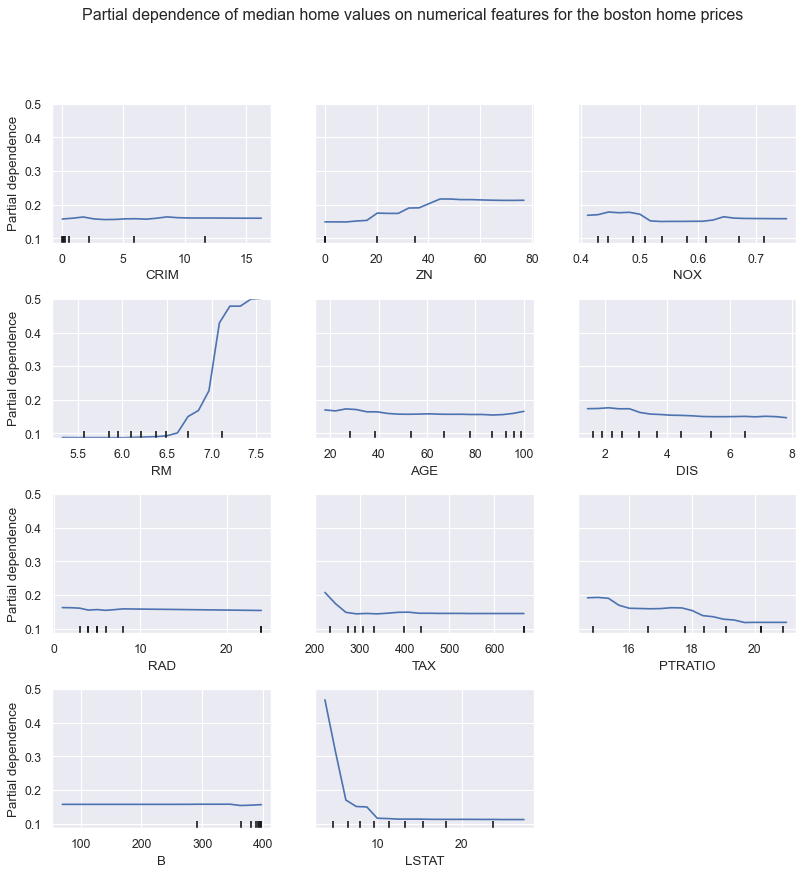

In [56]:
from time import time

print('Computing partial dependence plots...')
tic = time()

plot_partial_dependence(grid.best_estimator_, data, features=list(range(11)),
                        n_jobs=-1, grid_resolution=20)
print("done in {:.3f}s".format(time() - tic))

fig = plt.gcf()
fig.subplots_adjust(wspace=0.2, hspace=0.4)
fig.suptitle('Partial dependence of median home values on numerical features for the boston home prices')
fig.set_figheight(12)
fig.set_figwidth(12);

## Checking model performance on Test (holdout) data
since we have selected our model and fine tuned it, we can now evaluate the model on the test data before deployement.

In [57]:
test_predictions = grid.best_estimator_.predict(test_data)

In [58]:
# getting all the scoring metrics in test data
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
test_accuracy = accuracy_score(test_data_labels, test_predictions)
test_precision = precision_score(test_data_labels, test_predictions)
test_recall = recall_score(test_data_labels, test_predictions)
test_f1_score = f1_score(test_data_labels, test_predictions)
test_roc_auc_score = roc_auc_score(test_data_labels, test_predictions)

print("Accuracy on test data: {:.3f}%".format(test_accuracy*100))
print("Precision on test data: {:.3f}%".format(test_precision*100))
print("Recall on test data: {:.3f}%".format(test_recall*100))
print("F1 Score on test data: {:.3f}%".format(test_f1_score*100))
print("AUC Score on test data: {:.3f}".format(test_roc_auc_score))

Accuracy on test data: 93.137%
Precision on test data: 78.261%
Recall on test data: 90.000%
F1 Score on test data: 83.721%
AUC Score on test data: 0.920


# we got some decent scores here

 now, we can refit the model in the entire data

In [59]:
all_data = df.drop(["MEDV","CAT_MEDV"],axis=1)
all_data_labels = df["CAT_MEDV"].copy()

In [60]:
all_data.head()

,CRIM,ZN,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CAT_CHAS,CAT_INDUS
0,0.00632,18.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,0.0,LOW
1,0.02731,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,0.0,LOW
2,0.02729,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,0.0,LOW
3,0.03237,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,0.0,LOW
4,0.06905,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,0.0,LOW


In [61]:
best_clf = grid.best_estimator_.fit(all_data,all_data_labels)

In [62]:
best_clf.named_steps

{'prep': ColumnTransformer(n_jobs=-1,
                   transformers=[('num_notscaled',
                                  Pipeline(steps=[('num_imputer',
                                                   SimpleImputer(strategy='median')),
                                                  ('num_attribs_adder', None)]),
                                  ['CRIM', 'ZN', 'NOX', 'RM', 'AGE', 'DIS',
                                   'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']),
                                 ('ord',
                                  Pipeline(steps=[('cat_ordinal_imputer',
                                                   SimpleImputer(strategy='most_frequent')),
                                                  ('cat_ordinal_encoder',
                                                   OrdinalEncoder())]),
                                  ['CAT_INDUS']),
                                 ('cat',
                                  Pipeline(steps=[('cat_imputer',
               

### Saving the model for Deployement

In [63]:
from joblib import dump, load

In [64]:
dump(best_clf,"boston_best_clf.joblib")

['boston_best_clf.joblib']

## Regression

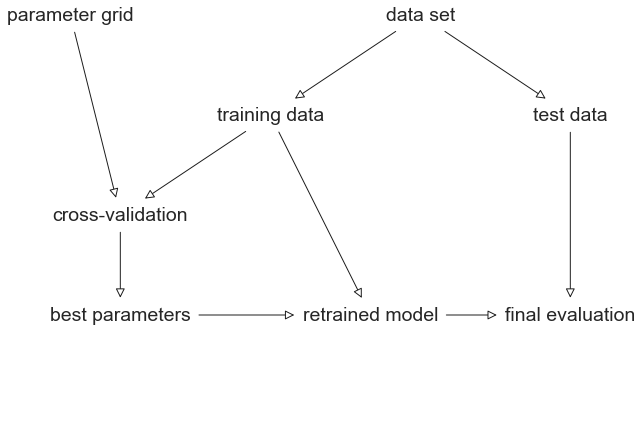

In [65]:
import mglearn
mglearn.plots.plot_grid_search_overview()

In [66]:
# we will use our initial train and test data. 
train_set.head()

,CRIM,ZN,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT_MEDV,CAT_CHAS,CAT_INDUS
172,0.13914,0.0,0.510,5.572,88.5,2.5961,5.0,296.0,16.6,396.90,14.69,23.1,0,0.0,LOW
164,2.24236,0.0,0.605,5.854,91.8,2.4220,5.0,403.0,14.7,395.11,11.64,22.7,0,0.0,MED
296,0.05372,0.0,0.437,6.549,51.0,5.9604,4.0,289.0,16.0,392.85,7.39,27.1,0,0.0,MED
31,1.35472,0.0,0.538,6.072,100.0,4.1750,4.0,307.0,21.0,376.73,13.04,14.5,0,0.0,LOW
192,0.08664,45.0,0.437,7.178,26.3,6.4798,5.0,398.0,15.2,390.49,2.87,36.4,1,0.0,LOW


In [67]:
train_set.shape

(404, 15)

In [68]:
test_set.shape

(102, 15)

In [69]:
# seperating the data and data lebels and dropiing irrelevant features
data=train_set.drop(['MEDV','CAT_MEDV'],axis=1)
data_labels = train_set['CAT_MEDV'].copy()

In [70]:
data.head()

,CRIM,ZN,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CAT_CHAS,CAT_INDUS
172,0.13914,0.0,0.510,5.572,88.5,2.5961,5.0,296.0,16.6,396.90,14.69,0.0,LOW
164,2.24236,0.0,0.605,5.854,91.8,2.4220,5.0,403.0,14.7,395.11,11.64,0.0,MED
296,0.05372,0.0,0.437,6.549,51.0,5.9604,4.0,289.0,16.0,392.85,7.39,0.0,MED
31,1.35472,0.0,0.538,6.072,100.0,4.1750,4.0,307.0,21.0,376.73,13.04,0.0,LOW
192,0.08664,45.0,0.437,7.178,26.3,6.4798,5.0,398.0,15.2,390.49,2.87,0.0,LOW


In [71]:
# duplicating the stpes with test data also
test_data=test_set.drop(['MEDV','CAT_MEDV'],axis=1)
test_data_labels = test_set['CAT_MEDV'].copy()

In [74]:
num_pipe_scaled = Pipeline([
        ('num_imputer', SimpleImputer(strategy="median")),
        ('num_attribs_adder', None), # no new derived attributes added
        ('num_std_scaler', StandardScaler()) # comment for comparing the data columns to original data
    ])

num_pipe_notscaled = Pipeline([
        ('num_imputer', SimpleImputer(strategy="median")),
        ('num_attribs_adder', None) # no new derived attributes added
    ])

ord_pipe = Pipeline([
        ('cat_ordinal_imputer', SimpleImputer(strategy="most_frequent")),
        ('cat_ordinal_encoder', OrdinalEncoder())
    ])

cat_pipe = Pipeline([
        ('cat_imputer', SimpleImputer(strategy="most_frequent")),
        ('cat_onehot_encoder', OneHotEncoder())
    ])

prep_pipe_scaled = ColumnTransformer([
        ("num_scaled", num_pipe_scaled, num_attribs), # numerical attributes with scaling
        ("ord", ord_pipe, ord_attribs),
        ("cat", cat_pipe, cat_attribs),
    ], n_jobs=-1)

prep_pipe_notscaled = ColumnTransformer([
        ("num_notscaled", num_pipe_notscaled, num_attribs), # numerical attributes without scaling
        ("ord", ord_pipe, ord_attribs),
        ("cat", cat_pipe, cat_attribs),
    ], n_jobs=-1)

In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

pipe = Pipeline([
        ("prep", prep_pipe_scaled),
        ("reg", RandomForestRegressor())
    ])
 
param_grid = [
    {'prep': [prep_pipe_scaled],
     'reg': [SVR()],
     'reg__kernel':['rbf', 'linear'],
     'reg__C': [0.01, 0.1, 1, 10, 100],
     'reg__gamma': [0.01, 0.1, 1, 10, 100]
    },
    {'prep': [prep_pipe_scaled],
     'reg': [Ridge()],
     'reg__alpha': [0.01, 0.1, 1, 10]
    },
    {'prep': [prep_pipe_scaled],
     'reg': [Lasso()],
     'reg__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]
    },
    {'prep': [prep_pipe_scaled, prep_pipe_notscaled], # check whether it is better to scale or not
     'reg': [RandomForestRegressor()],
     'reg__max_features': ['sqrt', 'log2'],
     'reg__n_estimators': [100, 200],
     'reg__max_depth': [3, 5, None],
    },
    {'prep': [prep_pipe_scaled, prep_pipe_notscaled], # check whether it is better to scale or not
     'reg': [GradientBoostingRegressor()],
     'reg__n_estimators': [100, 200],
     'reg__max_depth': [3, 5],
    }]

In [76]:
# using multiple metrics for reporting cross-validation scores
scoring = {'RMSE': 'neg_root_mean_squared_error', 'MSE': 'neg_mean_squared_error', 
           'MAE': 'neg_mean_absolute_error', 'R_square': 'r2'}

grid = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=3,
                    scoring=scoring, refit='RMSE',
                    return_train_score=True, 
                    n_jobs=-1, verbose=1)

In [77]:
grid.fit(data, data_labels)

Fitting 3 folds for each of 92 candidates, totalling 276 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(n_jobs=-1,
                                                          transformers=[('num_scaled',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('num_attribs_adder',
                                                                                          None),
                                                                                         ('num_std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['CRIM',
                                      

In [78]:
print("Best cross-validation score (RMSE score): {:.3f}".format(-grid.best_score_))

Best cross-validation score (RMSE score): 0.186


In [79]:
print("\n".join("{}:{}\n".format(k, v) for k, v in grid.best_params_.items()))

prep:ColumnTransformer(n_jobs=-1,
                  transformers=[('num_scaled',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('num_attribs_adder', None),
                                                 ('num_std_scaler',
                                                  StandardScaler())]),
                                 ['CRIM', 'ZN', 'NOX', 'RM', 'AGE', 'DIS',
                                  'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']),
                                ('ord',
                                 Pipeline(steps=[('cat_ordinal_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('cat_ordinal_encoder',
                                                  OrdinalEncoder())]),
                                 ['CAT_INDUS']),
    

In [80]:
# extract the best estimator found
print("Best estimator::")
print("\n".join("{}:\n{}\n".format(k, v) for k, v in grid.best_estimator_.steps))

Best estimator::
prep:
ColumnTransformer(n_jobs=-1,
                  transformers=[('num_scaled',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('num_attribs_adder', None),
                                                 ('num_std_scaler',
                                                  StandardScaler())]),
                                 ['CRIM', 'ZN', 'NOX', 'RM', 'AGE', 'DIS',
                                  'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']),
                                ('ord',
                                 Pipeline(steps=[('cat_ordinal_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('cat_ordinal_encoder',
                                                  OrdinalEncoder())]),
                                 ['

In [81]:
grid.best_estimator_.named_steps['prep'].transformers

[('num_scaled',
  Pipeline(steps=[('num_imputer', SimpleImputer(strategy='median')),
                  ('num_attribs_adder', None),
                  ('num_std_scaler', StandardScaler())]),
  ['CRIM',
   'ZN',
   'NOX',
   'RM',
   'AGE',
   'DIS',
   'RAD',
   'TAX',
   'PTRATIO',
   'B',
   'LSTAT']),
 ('ord',
  Pipeline(steps=[('cat_ordinal_imputer',
                   SimpleImputer(strategy='most_frequent')),
                  ('cat_ordinal_encoder', OrdinalEncoder())]),
  ['CAT_INDUS']),
 ('cat',
  Pipeline(steps=[('cat_imputer', SimpleImputer(strategy='most_frequent')),
                  ('cat_onehot_encoder', OneHotEncoder())]),
  ['CAT_CHAS'])]

In [82]:
grid.best_estimator_.named_steps['reg']

RandomForestRegressor(max_features='log2')

In [83]:
results = pd.DataFrame(grid.cv_results_)
print('\nCross-validation scores for all parameter combinations:')
results.T.loc[['params', 'mean_test_RMSE', 'mean_test_MSE', 'mean_test_MAE', 'mean_test_R_square']]


Cross-validation scores for all parameter combinations:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91
params,"{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_jobs=-1, ...","{'prep': ColumnTransformer(n_

In [84]:
-grid.best_score_

0.18602384961498344

In [85]:
results.loc[results['mean_test_RMSE'] == grid.best_score_].T.loc[['params', 'mean_test_RMSE', 'mean_test_MSE', 'mean_test_MAE', 'mean_test_R_square']]

,70
params,"{'prep': ColumnTransformer(n_jobs=-1, ..."
mean_test_RMSE,-0.186024
mean_test_MSE,-0.034792
mean_test_MAE,-0.090324
mean_test_R_square,0.720394


In [86]:
from sklearn.inspection import permutation_importance
r = permutation_importance(grid.best_estimator_, data, data_labels, n_repeats=10, random_state=0)

In [87]:
for i in r.importances_mean.argsort()[::-1]:
    print(f"{data.columns[i]:<12}"
          f"{r.importances_mean[i]:.3f}"
          f" +/- {r.importances_std[i]:.3f}")

RM          0.445 +/- 0.038
LSTAT       0.220 +/- 0.020
PTRATIO     0.076 +/- 0.004
TAX         0.064 +/- 0.005
DIS         0.045 +/- 0.004
ZN          0.032 +/- 0.002
NOX         0.028 +/- 0.003
AGE         0.021 +/- 0.002
CRIM        0.020 +/- 0.001
B           0.018 +/- 0.003
RAD         0.015 +/- 0.001
CAT_INDUS   0.010 +/- 0.001
CAT_CHAS    0.005 +/- 0.000


In [88]:
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{data.columns[i]:<12}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

RM          0.445 +/- 0.038
LSTAT       0.220 +/- 0.020
PTRATIO     0.076 +/- 0.004
TAX         0.064 +/- 0.005
DIS         0.045 +/- 0.004
ZN          0.032 +/- 0.002
NOX         0.028 +/- 0.003
AGE         0.021 +/- 0.002
CRIM        0.020 +/- 0.001
B           0.018 +/- 0.003
RAD         0.015 +/- 0.001
CAT_INDUS   0.010 +/- 0.001
CAT_CHAS    0.005 +/- 0.000


Computing partial dependence plots...


/Users/harshitchandrol/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


done in 1.807s


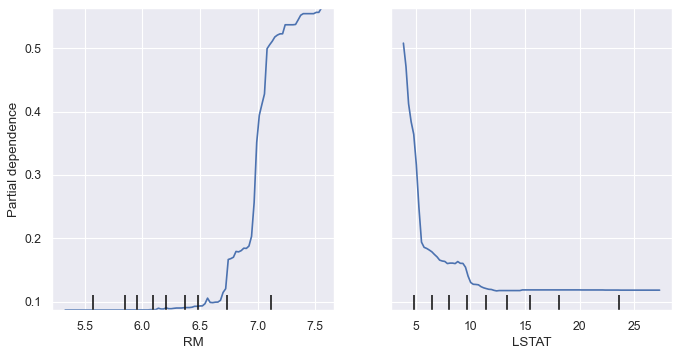

In [89]:
from sklearn.inspection import plot_partial_dependence
from time import time

print('Computing partial dependence plots...')
tic = time()

plot_partial_dependence(grid.best_estimator_, data, [3, 10]); # no interactions included
print("done in {:.3f}s".format(time() - tic))

fig = plt.gcf() # get current figure
fig.set_figheight(5)
fig.set_figwidth(10)

In [90]:
data.columns.to_list()

['CRIM',
 'ZN',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'CAT_CHAS',
 'CAT_INDUS']

Computing partial dependence plots...


/Users/harshitchandrol/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


done in 0.628s


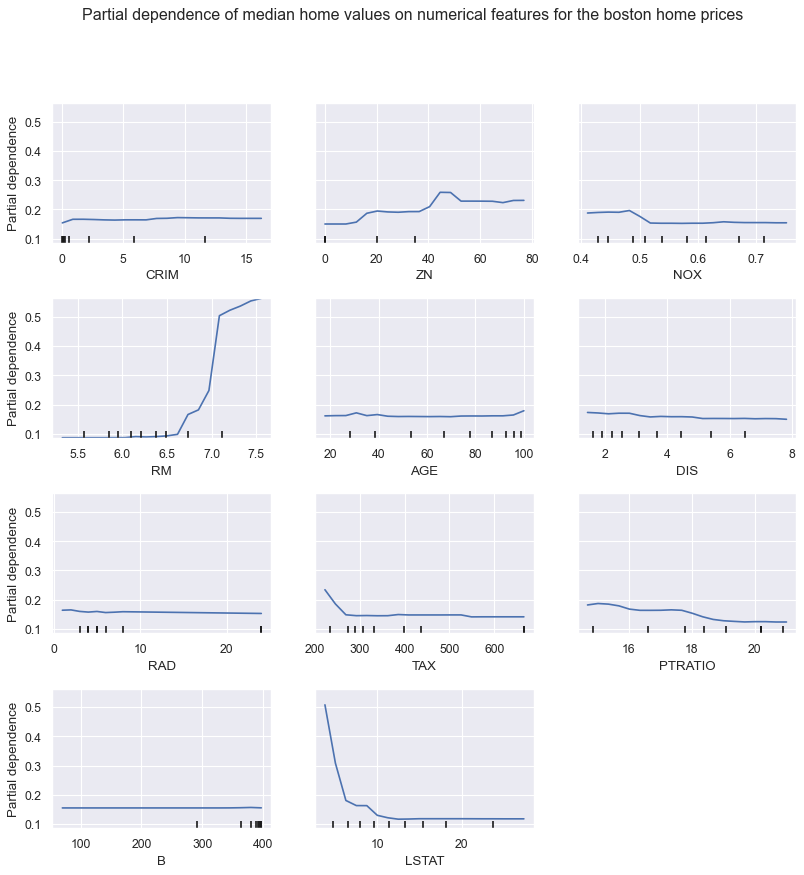

In [91]:
from time import time

print('Computing partial dependence plots...')
tic = time()

plot_partial_dependence(grid.best_estimator_, data, features=list(range(11)),
                        n_jobs=-1, grid_resolution=20)
print("done in {:.3f}s".format(time() - tic))

fig = plt.gcf()
fig.subplots_adjust(wspace=0.2, hspace=0.4)
fig.suptitle('Partial dependence of median home values on numerical features for the boston home prices')
fig.set_figheight(12)
fig.set_figwidth(12)

Checking the model performance on test data

In [92]:
test_predictions = grid.best_estimator_.predict(test_data)

In [93]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
test_RMSE = np.sqrt(mean_squared_error(test_data_labels, test_predictions))
test_MSE = mean_squared_error(test_data_labels, test_predictions)
test_MAE = mean_absolute_error(test_data_labels, test_predictions)
test_R_square = r2_score(test_data_labels, test_predictions)

print("RMSE on test data: {:.3f}".format(test_RMSE))
print("MSE on test data: {:.3f}".format(test_MSE))
print("MAE on test data: {:.3f}".format(test_MAE))
print("R-square on test data: {:.3f}".format(test_R_square))

RMSE on test data: 0.229
MSE on test data: 0.053
MAE on test data: 0.115
R-square on test data: 0.666


In [94]:
# refitting the model on the entire dataset
all_data = df.drop(["MEDV", "CAT_MEDV"], axis=1) # drop labels and irrelevant attributes
all_data_labels = df["MEDV"].copy()

In [95]:
all_data.head()

,CRIM,ZN,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CAT_CHAS,CAT_INDUS
0,0.00632,18.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,0.0,LOW
1,0.02731,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,0.0,LOW
2,0.02729,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,0.0,LOW
3,0.03237,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,0.0,LOW
4,0.06905,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,0.0,LOW


In [96]:
best_reg = grid.best_estimator_.fit(all_data, all_data_labels)

In [97]:
best_reg.named_steps

{'prep': ColumnTransformer(n_jobs=-1,
                   transformers=[('num_scaled',
                                  Pipeline(steps=[('num_imputer',
                                                   SimpleImputer(strategy='median')),
                                                  ('num_attribs_adder', None),
                                                  ('num_std_scaler',
                                                   StandardScaler())]),
                                  ['CRIM', 'ZN', 'NOX', 'RM', 'AGE', 'DIS',
                                   'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']),
                                 ('ord',
                                  Pipeline(steps=[('cat_ordinal_imputer',
                                                   SimpleImputer(strategy='most_frequent')),
                                                  ('cat_ordinal_encoder',
                                                   OrdinalEncoder())]),
                                  ['

In [98]:
## saving the model for deployement
dump(best_clf,"boston_best_reg.joblib")

['boston_best_reg.joblib']

## In this project we have now succesfully demonstarated 
## Building pipelines for classification and Regression. 
# References : 
1. Course work - Umass Lowell- Advance Data Mining
2. Udemy course - 365 data science 
3. Krishna Naik YouTube Videos. 